# Importing Needed Packages

In [78]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 

%matplotlib inline 

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [79]:
weather_df = pd.read_csv('Hanoi_weather.csv', parse_dates=['date'], index_col='date')
weather_df.head(5) # Show the first 5 rows

province  max  min  wind  rain  humidi  cloud  pressure
date                                                              
2009-01-01   Ha Noi   19   12     6   0.0      70     44      1025
2009-01-02   Ha Noi   18   12     6   0.5      65     28      1025
2009-01-03   Ha Noi   20   13     5   0.7      74     40      1022
2009-01-04   Ha Noi   25   12     5   0.0      81     46      1018
2009-01-05   Ha Noi   23   14     5   1.3      90     75      1017

# Checking columns in our dataframe

In [80]:
weather_df.columns

Index(['province', 'max', 'min', 'wind', 'rain', 'humidi', 'cloud',
       'pressure'],
      dtype='object')

## Now shape

In [81]:
weather_df.shape 

(4549, 8)

In [82]:
weather_df.describe()

max          min         wind         rain       humidi  \
count  4549.000000  4549.000000  4549.000000  4549.000000  4549.000000   
mean     29.489998    21.721257     8.382282     4.177028    74.206419   
std       6.217772     4.911990     3.186597     8.931418    10.925099   
min       7.000000     2.000000     2.000000     0.000000    28.000000   
25%      25.000000    19.000000     6.000000     0.000000    68.000000   
50%      30.000000    23.000000     8.000000     0.900000    76.000000   
75%      34.000000    26.000000    10.000000     4.500000    82.000000   
max      45.000000    32.000000    25.000000   203.200000    97.000000   

             cloud     pressure  
count  4549.000000  4549.000000  
mean     50.408661  1011.211695  
std      26.183295     6.898611  
min       0.000000   993.000000  
25%      30.000000  1005.000000  
50%      49.000000  1011.000000  
75%      71.000000  1016.000000  
max     100.000000  1037.000000

# Checking is there any null values in dataset

In [83]:
weather_df.isnull().any()

province    False
max         False
min         False
wind        False
rain        False
humidi      False
cloud       False
pressure    False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [84]:
weather_df_num=weather_df.loc[:,['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']]
weather_df_num.head()

max  min  wind  rain  humidi  cloud  pressure
date                                                     
2009-01-01   19   12     6   0.0      70     44      1025
2009-01-02   18   12     6   0.5      65     28      1025
2009-01-03   20   13     5   0.7      74     40      1022
2009-01-04   25   12     5   0.0      81     46      1018
2009-01-05   23   14     5   1.3      90     75      1017

# Shape of new dataframe

In [85]:
weather_df_num.shape

(4549, 7)

# Columns in new dataframe

In [86]:
weather_df_num.columns

Index(['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure'], dtype='object')

## Ploting all the column values

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

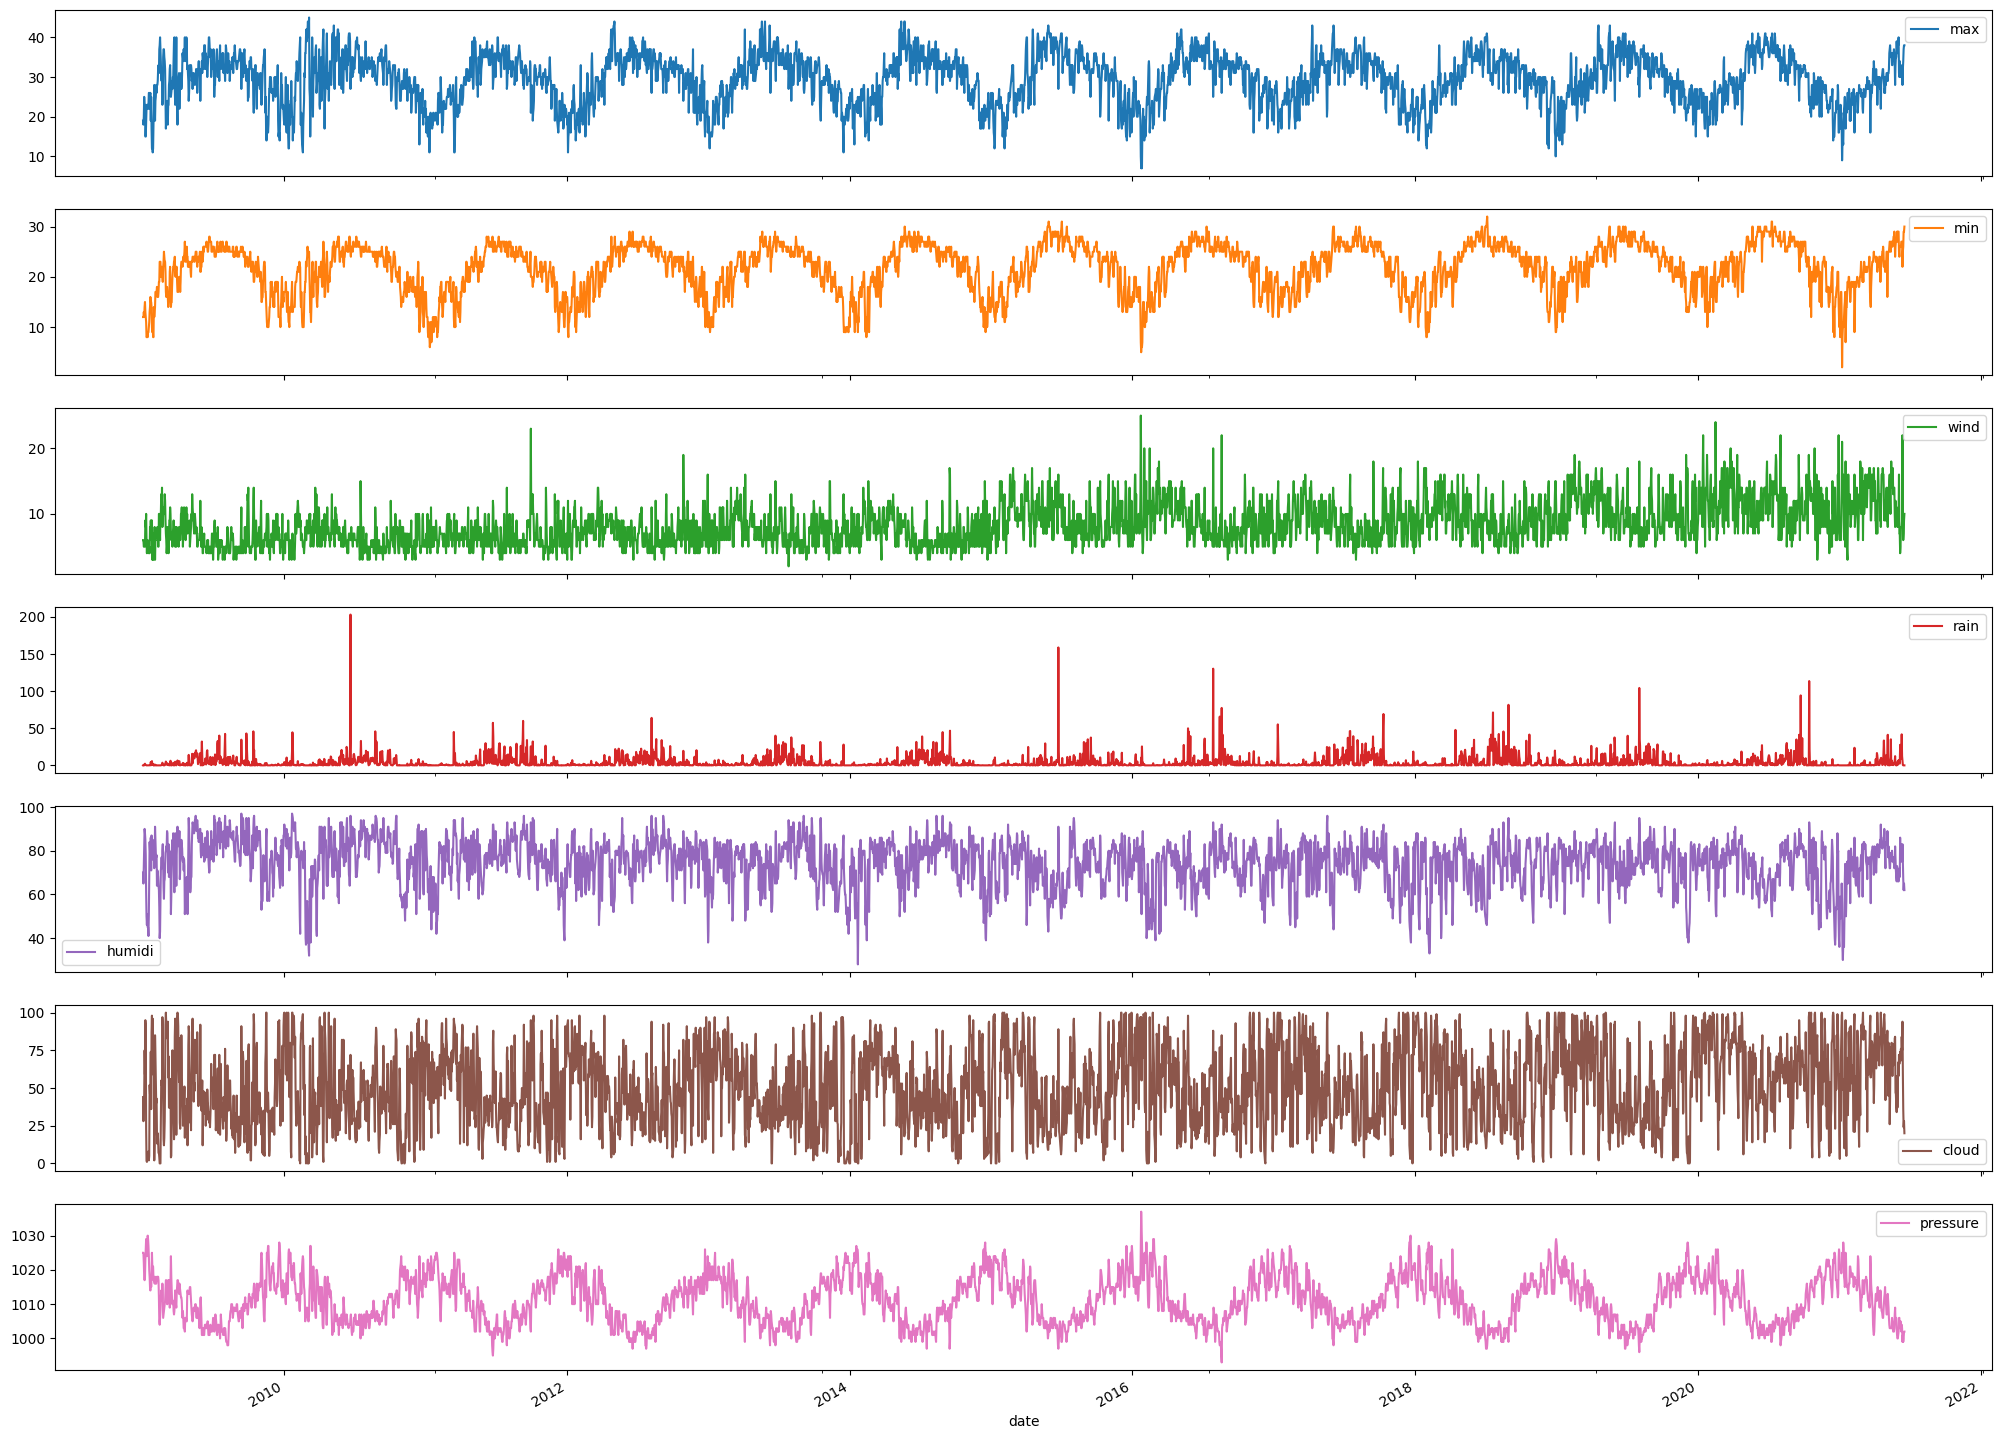

In [87]:
weather_df_num.plot(subplots=True, figsize=(25,20))

# Ploting all the column values for 1 year

In [88]:
weather_df_num = weather_df_num.sort_index().loc['2019' : '2020'] 

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

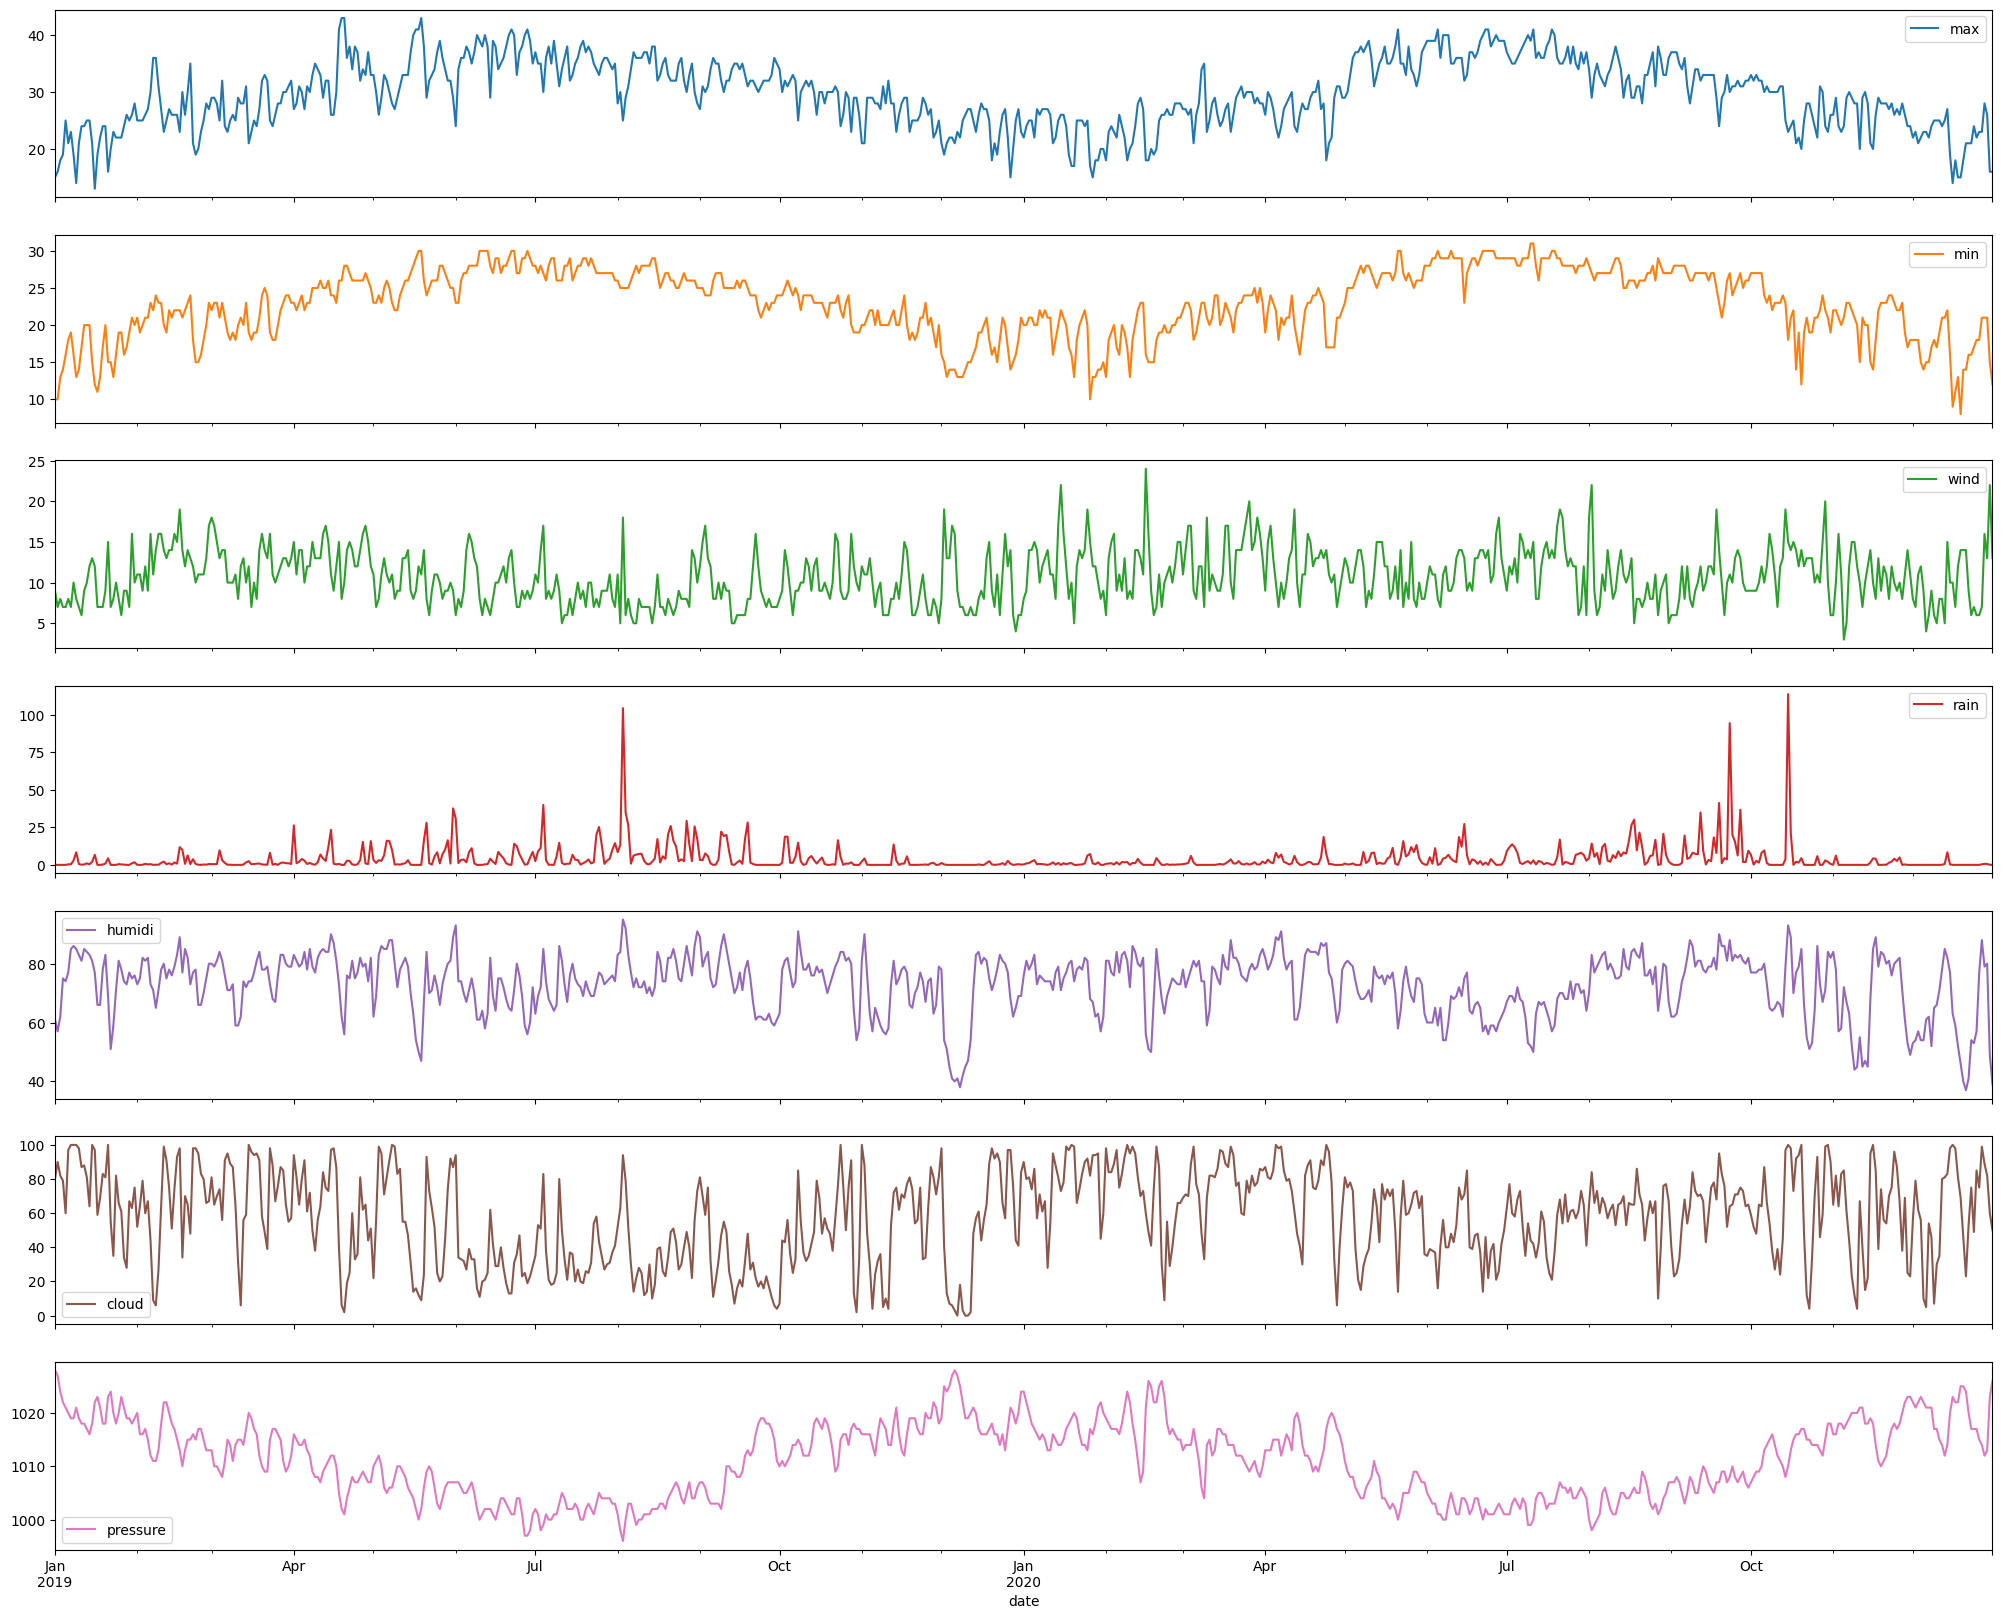

In [89]:
weather_df_num.index = pd.to_datetime(weather_df_num.index, format='mixed', dayfirst=True)
weather_df_num['2019':'2020'].resample('D').fillna(method= 'pad').plot(subplots=True, figsize=(25,20))


array([[<Axes: title={'center': 'max'}>, <Axes: title={'center': 'min'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humidi'}>,
        <Axes: title={'center': 'cloud'}>],
       [<Axes: title={'center': 'pressure'}>, <Axes: >, <Axes: >]],
      dtype=object)

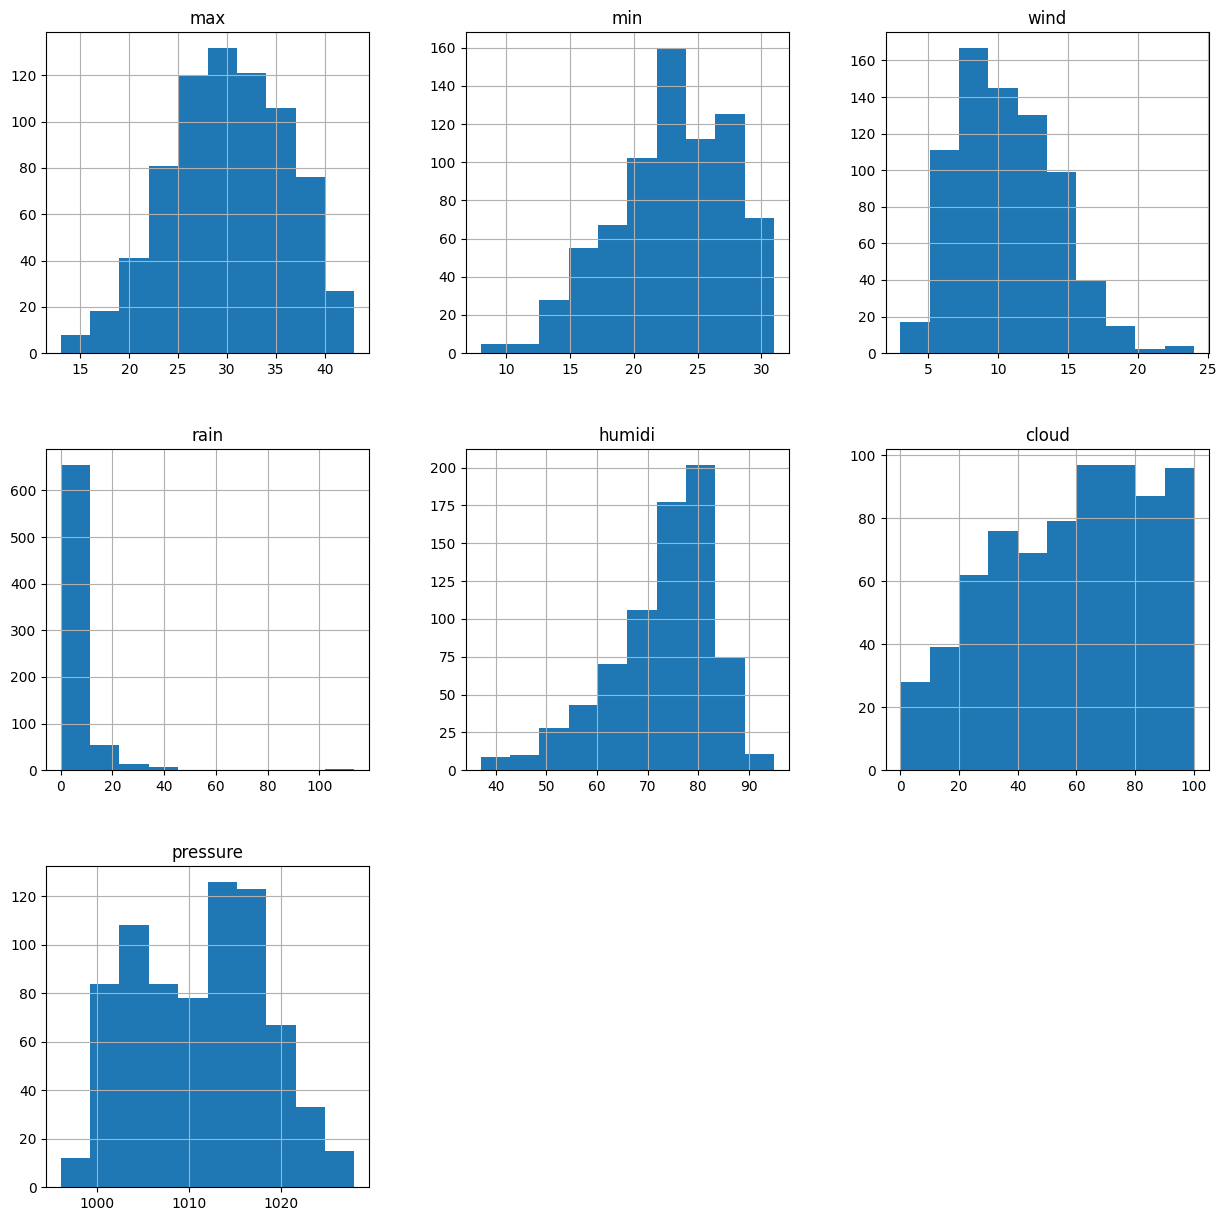

In [90]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [91]:
weth=weather_df_num['2019':'2020']
weth.head()

max  min  wind  rain  humidi  cloud  pressure
date                                                     
2019-01-01   15   10     9   0.0      61     80      1028
2019-01-02   16   10     7   0.0      57     90      1027
2019-01-03   18   13     8   0.0      62     82      1024
2019-01-04   19   14     7   0.0      75     79      1022
2019-01-05   25   16     7   0.0      74     60      1021

In [92]:
weather_y=weather_df_num.pop('max')
weather_x=weather_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [93]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [94]:
train_X.shape

(584, 6)

In [95]:
train_y.shape

(584,)

### train_y has all the features except temperature and train_x has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [96]:
train_y.head()

date
2019-11-27    27
2020-10-02    32
2020-11-01    26
2019-04-19    43
2020-01-19    17
Name: max, dtype: int64

# Multiple Linear Regression

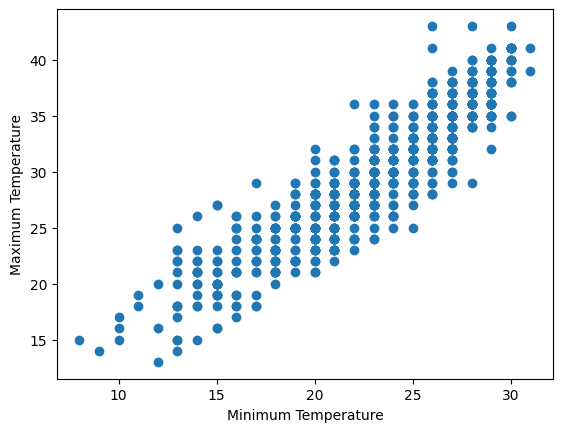

In [97]:
plt.scatter(weth['min'], weth['max'])
plt.xlabel("Minimum Temperature")
plt.ylabel("Maximum Temperature")
plt.show()

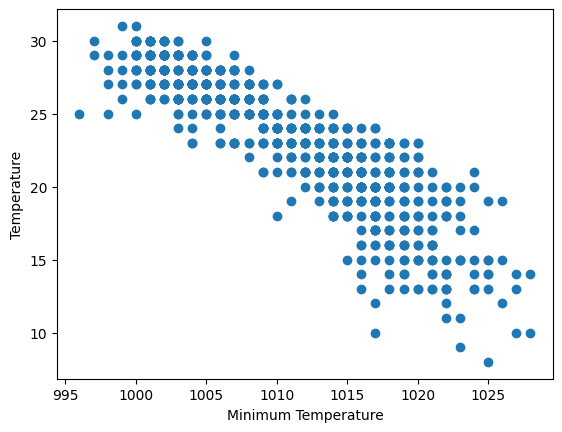

In [98]:
plt.scatter(weth['pressure'], weth['min'])
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

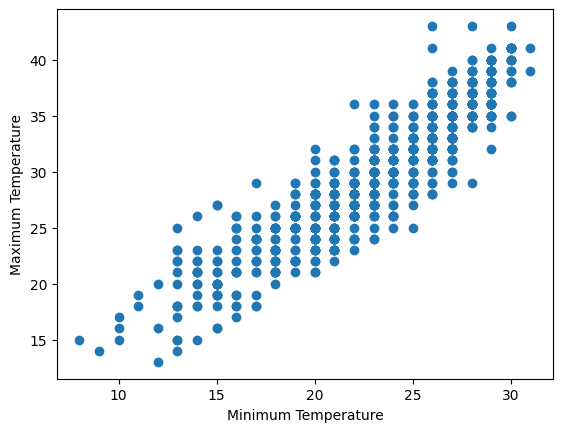

In [99]:
plt.scatter(weth['min'], weth['max'])
plt.xlabel("Minimum Temperature")
plt.ylabel("Maximum Temperature")
plt.show()

In [117]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [101]:
prediction = model.predict(test_X)

In [102]:
#calculating error
np.mean(np.absolute(prediction-test_y))

1.4500186381379823

In [103]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.90


In [104]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

Actual  Prediction  diff
date                                
2020-02-04      23       24.29 -1.29
2019-10-01      34       34.06 -0.06
2020-10-09      30       29.28  0.72
2020-08-17      29       31.74 -2.74
2019-03-18      24       23.43  0.57
...            ...         ...   ...
2019-09-07      35       37.00 -2.00
2019-01-09      14       16.62 -2.62
2020-02-25      26       27.06 -1.06
2019-07-29      35       35.93 -0.93
2020-12-10      25       25.52 -0.52

[146 rows x 3 columns]

# Decision Tree Regression 

In [105]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [106]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

1.7123287671232876

In [107]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.86


In [108]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

Actual  Prediction  diff
date                                
2020-02-04      23        23.0   0.0
2019-10-01      34        35.0  -1.0
2020-10-09      30        29.0   1.0
2020-08-17      29        30.0  -1.0
2019-03-18      24        26.0  -2.0
...            ...         ...   ...
2019-09-07      35        38.0  -3.0
2019-01-09      14        21.0  -7.0
2020-02-25      26        26.0   0.0
2019-07-29      35        35.0   0.0
2020-12-10      25        26.0  -1.0

[146 rows x 3 columns]

# Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [110]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

1.3075342465753428

In [111]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.93


In [112]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

Actual  Prediction  diff
date                                
2020-02-04      23       24.53 -1.53
2019-10-01      34       34.85 -0.85
2020-10-09      30       28.77  1.23
2020-08-17      29       31.17 -2.17
2019-03-18      24       24.39 -0.39
...            ...         ...   ...
2019-09-07      35       37.13 -2.13
2019-01-09      14       17.69 -3.69
2020-02-25      26       27.13 -1.13
2019-07-29      35       35.37 -0.37
2020-12-10      25       25.77 -0.77

[146 rows x 3 columns]

In [113]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [114]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 1.45
Residual sum of squares (MSE): 3.45
R2-score: 0.90


# Calculating R2-score for Decision Tree Regression

In [115]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 1.71
Residual sum of squares (MSE): 4.95
R2-score: 0.86


# Calculating R2-score for Random Forest Regression

In [116]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 1.31
Residual sum of squares (MSE): 2.57
R2-score: 0.93
